In [1]:
#packages 
import xarray as xr
import pandas as pd
import matplotlib.dates as mdates
import numpy as np
import ctd
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore", UserWarning)
import pandas as pd
import csv
import sys
import array
import xarray as xr
import cmocean
def write_with_byte_inversion(f, tab):
    tab2write = array.array('f', tab.T.flatten())
    if sys.byteorder == 'little':
        tab2write.byteswap()
    f.write(tab2write)

dtype=np.float32
#topo_adjust to topo wi
import matplotlib.pyplot as plt
import cmocean.cm as cmocean
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import FuncFormatter
import pathlib
from pathlib import Path
import os
import netCDF4
from netCDF4 import Dataset as nc
import glob
from glob import glob
import glidertools as gt
from cmocean import cm as cmo 





In [2]:
ds = xr.open_mfdataset('C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/QUICCHE_CTDs.nc').load()

In [3]:
ds

<xarray.Dataset>
Dimensions:                    (cast: 2, station: 25, pressure: 5100)
Coordinates:
  * cast                       (cast) object 'down' 'up'
  * station                    (station) int64 1 2 3 4 5 6 ... 20 21 22 23 24 25
    latitude                   (station, cast) float64 -35.02 -35.02 ... -37.45
    longitude                  (station, cast) float64 16.61 16.61 ... 17.67
    max_pressure               (cast, station) float64 3.685e+03 ... 991.0
  * pressure                   (pressure) int64 0 1 2 3 ... 5096 5097 5098 5099
Data variables: (12/20)
    time                       (cast, station, pressure) float64 nan nan ... nan
    beam_attenuation           (cast, station, pressure) float64 nan nan ... nan
    beam_transmission          (cast, station, pressure) float64 nan nan ... nan
    conductivity1              (cast, station, pressure) float64 nan nan ... nan
    conductivity2              (cast, station, pressure) float64 nan nan ... nan
    chlorophyll                (cast, station, pressure) float64 nan nan ... nan
    ...                         ...
    salinity1                  (cast, station, pressure) float64 nan nan ... nan
    salinity2                  (cast, station, pressure) float64 nan nan ... nan
    sound_velocity             (cast, station, pressure) float64 nan nan ... nan
    density1                   (cast, station, pressure) float64 nan nan ... nan
    density2                   (cast, station, pressure) float64 nan nan ... nan
    altimeter                  (cast, station, pressure) float64 nan nan ... nan
Attributes: (12/38)
    name:                             QUICCHE CTD
    description:                      CTD casts taken during the 2023 QUICCHE...
    project:                          QUICCHE
    project_url:                      https://beal-agulhas.earth.miami.edu/re...
    creator_email:                    johan.edholm@gu.se
    creator_name:                     Johan Edholm
    ...                               ...
    binavg_min_scans_bin:             1
    binavg_max_scans_bin:             2147483647
    binavg_surface_bin:               no, min = 0.000, max = 0.000, value = 0...
    processing_date:                  Apr 11 2023
    split_excl_bad_scans:             yes
    file_type:                        ascii

In [11]:
temp1  = ds.temperature1.sel(cast = 'down', station=15)
temp2 = ds.temperature2.sel(cast = 'down', station=15)
temp1

<xarray.DataArray 'temperature1' (pressure: 5100)>
array([nan, nan, nan, ..., nan, nan, nan])
Coordinates:
    cast          <U4 'down'
    station       int64 15
    latitude      float64 -37.53
    longitude     float64 17.35
    max_pressure  float64 4.517e+03
  * pressure      (pressure) int64 0 1 2 3 4 5 ... 5094 5095 5096 5097 5098 5099
Attributes:
    units:          °C
    long_name:      Temperature 1
    standard_name:  sea_water_temperature

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


temp1 and temp2 do not have the same values.


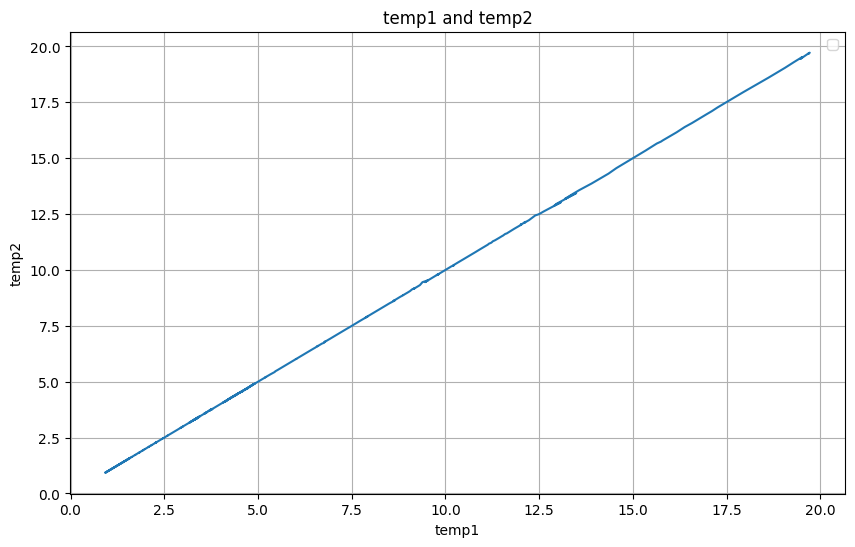

In [18]:
# Check if temp1 and temp2 have the same values
are_equal = np.array_equal(temp1, temp2)

if are_equal:
    print("temp1 and temp2 have the same values.")
else:
    print("temp1 and temp2 do not have the same values.")

# Plot oxygen data against pressure at station 15
plt.figure(figsize=(10, 6))
plt.plot(temp1, temp2)
plt.xlabel('temp1')
plt.ylabel('temp2')
plt.title('temp1 and temp2')
plt.legend()
plt.grid(True)
plt.show()

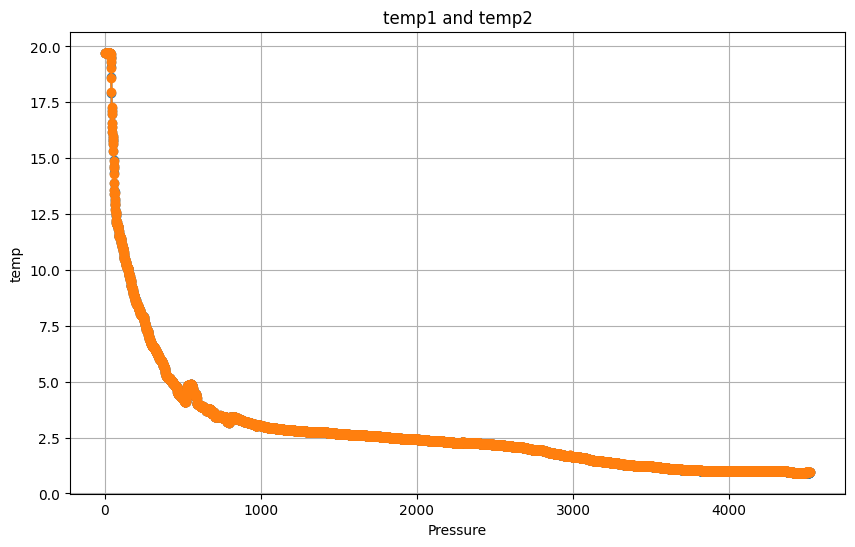

In [14]:
# Plot oxygen data against pressure at station 15
plt.figure(figsize=(10, 6))
plt.plot(temp1.pressure, temp1, marker='o')
plt.plot(temp2.pressure, temp2, marker='o')
plt.xlabel('Pressure')
plt.ylabel('temp')
plt.title('temp1 and temp2')
plt.grid(True)
plt.show()

In [4]:
ds.cast

<xarray.DataArray 'cast' (cast: 2)>
array(['down', 'up'], dtype=object)
Coordinates:
  * cast     (cast) object 'down' 'up'

In [15]:
# Select the "up" cast from the oxygen_saturation_GG data
ox_upcast = ds.oxygen_concentration_mmm3.sel(cast='up')
ox_upcast


ox_upcast.to_netcdf('ox_upcast_data.nc')


In [20]:
# Select the "up" cast from the oxygen_saturation_GG data
ox_downcast = ds.oxygen_concentration_mmm3.sel(cast='down', station=15)
#ox_downcast

temperature = ds.temperature1.sel(cast='down', station=15)

#ox_downcast.to_netcdf('ox_downcast_data.nc')

In [24]:
# creating new dataset

# Extract the data from the DataArray objects
temp_data = temperature.values
ox_data = ox_downcast.values
#latitude_data = ds_work.latitude.values
#longitude_data = ds_work.longitude.values


# Get the dimension names for temp, salinity, and o2
temp_dims = temperature.dims
ox_dims = ox_downcast.dims

#latitude_dims = ds_work.latitude_gsm.dims
#longitude_dims = ds_work.longitude_gsm.dims


# Create the Dataset
ds_ctd = xr.Dataset(
    data_vars=dict(
        temp=(temp_dims, temp_data),
        ox_downcast = (ox_dims, ox_data),
        #latitude = (latitude_dims, latitude_data),
        #longitude  = (longitude_dims, longitude_data),
        
    ),
    coords=dict(
        pressure = ds.pressure,
        latitude = ds.latitude,
        longitude = ds.longitude,
    ),
    attrs=dict(description="CTD dataset"),
)

# Print the dataset
print(ds_ctd)

<xarray.Dataset>
Dimensions:       (pressure: 5100, cast: 2, station: 25)
Coordinates:
  * pressure      (pressure) int64 0 1 2 3 4 5 ... 5094 5095 5096 5097 5098 5099
  * cast          (cast) object 'down' 'up'
  * station       (station) int64 1 2 3 4 5 6 7 8 9 ... 18 19 20 21 22 23 24 25
    longitude     (station, cast) float64 16.61 16.61 16.57 ... 17.67 17.67
    max_pressure  (cast, station) float64 3.685e+03 3.055e+03 ... 991.0
    latitude      (station, cast) float64 -35.02 -35.02 -35.34 ... -37.45 -37.45
Data variables:
    temp          (pressure) float64 nan nan nan nan 19.71 ... nan nan nan nan
    ox_downcast   (pressure) float64 nan nan nan nan 227.4 ... nan nan nan nan
Attributes:
    description:  CTD dataset


In [25]:
ds_ctd.to_netcdf('ds_ctd_final.nc')

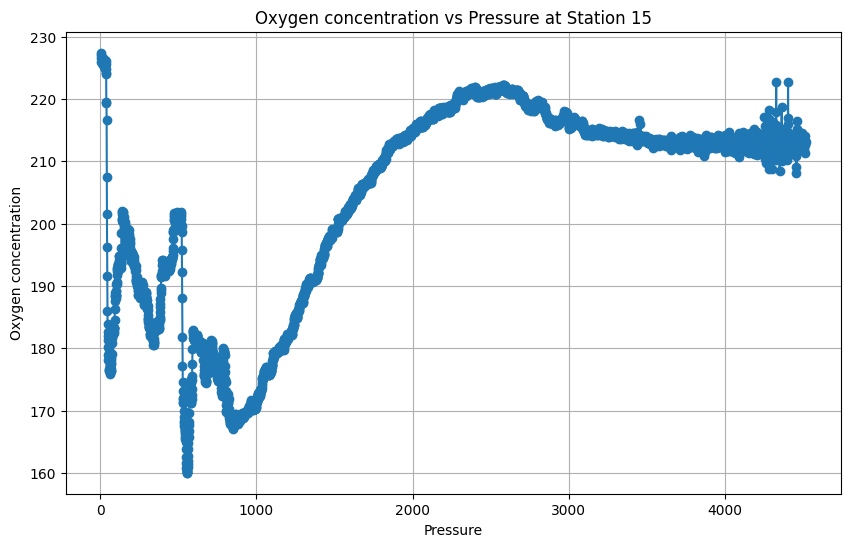

Longitude at Station 15: 17.354
Latitude at Station 15: -37.5289


In [18]:

# Extract oxygen data at station 15
oxygen_station_15 = ox_downcast.sel(station=15)

# Extract pressure values
pressure_levels = ox_downcast.pressure.values

# Plot oxygen data against pressure at station 15
plt.figure(figsize=(10, 6))
plt.plot(pressure_levels, oxygen_station_15, marker='o', linestyle='-')
plt.xlabel('Pressure')
plt.ylabel('Oxygen concentration')
plt.title('Oxygen concentration vs Pressure at Station 15')
plt.grid(True)
plt.show()


# Extract longitude and latitude
longitude_station_15 = oxygen_station_15.longitude.values
latitude_station_15 = oxygen_station_15.latitude.values


print("Longitude at Station 15:", longitude_station_15)
print("Latitude at Station 15:", latitude_station_15)

In [10]:
import pickle

with open('my_dataset.pickle', 'rb') as data:
    dataset = pickle.load(data)

In [11]:
dataset

<xarray.Dataset>
Dimensions:      (ctd_depth: 999, paired_dive: 298)
Coordinates:
  * ctd_depth    (ctd_depth) float64 0.5 1.5 2.5 3.5 ... 995.5 996.5 997.5 998.5
  * paired_dive  (paired_dive) int64 1 2 3 4 5 6 7 ... 293 294 295 296 297 298
Data variables:
    temp         (ctd_depth, paired_dive) float64 nan 19.72 19.71 ... nan nan
    salinity     (ctd_depth, paired_dive) float64 nan 35.51 35.5 ... nan nan nan
    o2           (ctd_depth, paired_dive) float64 nan 193.8 193.3 ... nan nan
    pressure     (ctd_depth, paired_dive) float64 0.647 0.4317 ... nan nan
Attributes:
    description:  dataset including gridded data

In [21]:
pres = np.arange(0,5099,1)
np.shape(pres)

(5099,)

In [20]:
np.shape(dataset.pressure)

(999, 298)

In [26]:
np.shape(ds.oxygen_concentration_mll)

(2, 25, 5100)